<a href="https://colab.research.google.com/github/Saloni1707/TrainModel/blob/main/mlPractice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Polynomial Regression

1. Use this tech when the data shows non-linear trends
2. When a straight line underfits the data.
3. Higher degrees may overfit the data tc!



In [1]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import numpy as np

In [2]:
X = np.array([10,20,30,40,50]).reshape(-1,1)
y=np.array([5,15,30,55,85])

In [5]:
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)
#Fit Regression model
model = LinearRegression()
model.fit(X_poly,y)
pred=model.predict(poly.transform([[35]]))
print("Predict braking distance:",pred[0])

Predict braking distance: 41.749999999999986


### Selection Regression


In [6]:
import pandas as pd
import statsmodels.api as sm

In [12]:
data = {
    'Hours':[5,6,7,8,3,4],
    'Attendance':[90,80,85,60,70,90],
    'Sleep':[7,6,8,5,6,10],
    'Particpation':[8,6,9,5,7,9],
    'Score':[70,68,85,52,60,90]
}

In [13]:
df=pd.DataFrame(data)
X=df.drop('Score',axis=1)
y=df['Score']
X=sm.add_constant(X)  #adds a intercept col to our feature matrix
model=sm.OLS(y,X).fit() #Ordinary Least Square
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Score   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.784
Method:                 Least Squares   F-statistic:                     5.531
Date:                Tue, 05 Aug 2025   Prob (F-statistic):              0.307
Time:                        17:02:34   Log-Likelihood:                -14.582
No. Observations:                   6   AIC:                             39.16
Df Residuals:                       1   BIC:                             38.12
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -8.2109     26.210     -0.313   

/usr/local/lib/python3.11/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


###Decision Tree With Numerical Features

In [14]:
data=pd.DataFrame({
    "Age": [17, 64, 18, 20, 38, 49, 55, 25, 29, 31, 33],
    "Loan Default": [1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1],
})
data

,Age,Loan Default
0,17,1
1,64,0
2,18,1
3,20,0
4,38,1
5,49,0
6,55,0
7,25,1
8,29,1
9,31,0


In [15]:
data.sort_values("Age")

,Age,Loan Default
0,17,1
2,18,1
3,20,0
7,25,1
8,29,1
9,31,0
10,33,1
4,38,1
5,49,0
6,55,0


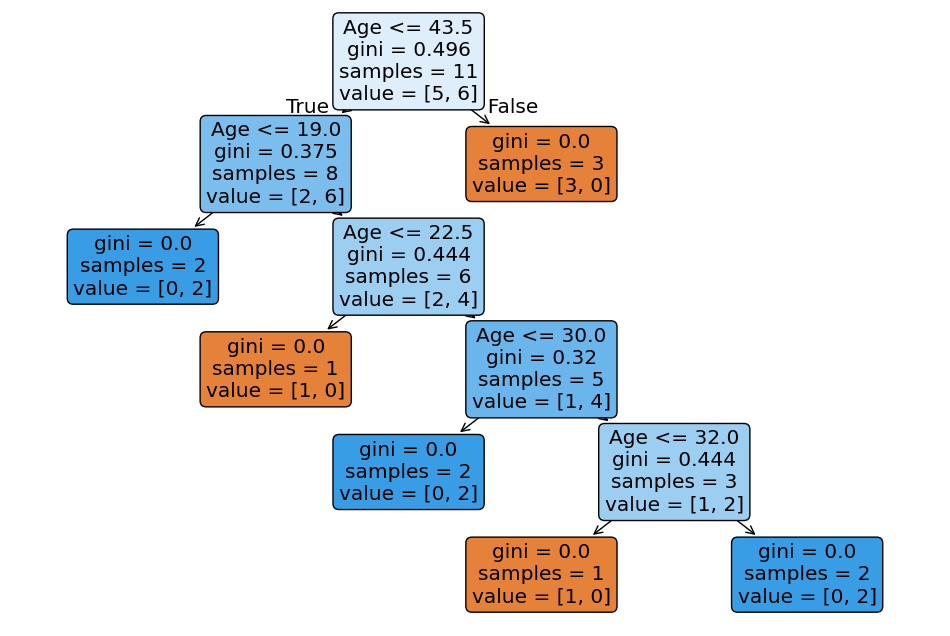

In [17]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

age_tree=DecisionTreeClassifier(random_state=17)
age_tree.fit(data["Age"].values.reshape(-1, 1), data["Loan Default"].values)

# Visualize the tree (optional)
plt.figure(figsize=(12, 8))
plot_tree(age_tree, feature_names=["Age"], filled=True, rounded=True)
plt.show()

### Data distributed by the function f(x) + noise.Then Train

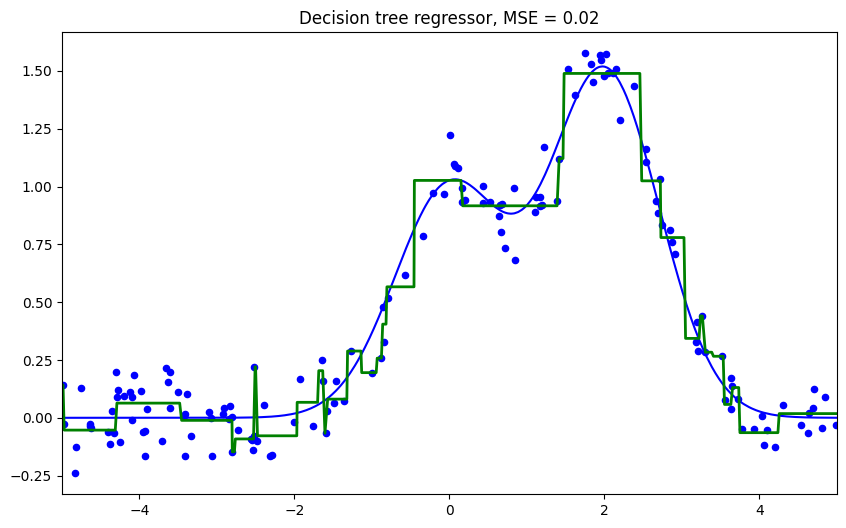

In [21]:
n_train = 150
n_test = 1000
noise = 0.1


def f(x):
    x = x.ravel()
    return np.exp(-(x ** 2)) + 1.5 * np.exp(-((x - 2) ** 2))


def generate(n_samples, noise):
    X = np.random.rand(n_samples) * 10 - 5
    X = np.sort(X).ravel()
    y = (
        np.exp(-(X ** 2))
        + 1.5 * np.exp(-((X - 2) ** 2))
        + np.random.normal(0.0, noise, n_samples)
    )
    X = X.reshape((n_samples, 1))
    return X, y


X_train, y_train = generate(n_samples=n_train, noise=noise)
X_test, y_test = generate(n_samples=n_test, noise=noise)

from sklearn.tree import DecisionTreeRegressor

reg_tree = DecisionTreeRegressor(max_depth=5, random_state=17)

reg_tree.fit(X_train, y_train)
reg_tree_pred = reg_tree.predict(X_test)

plt.figure(figsize=(10, 6))
plt.plot(X_test, f(X_test), "b")
plt.scatter(X_train, y_train, c="b", s=20)
plt.plot(X_test, reg_tree_pred, "g", lw=2)
plt.xlim([-5, 5])
plt.title(
    "Decision tree regressor, MSE = %.2f"
    % (np.sum((y_test - reg_tree_pred) ** 2) / n_test)
)
plt.show()
